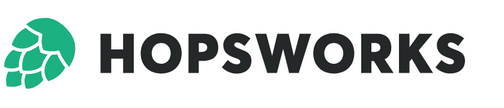

# Batch Predictions
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/logicalclocks/hopsworks-tutorials/blob/master/fraud_batch/3_model_training.ipynb)

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [1]:
!pip install -U hopsworks --quiet

In [2]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/398
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
start_time = int(start_date.timestamp()) * 1000
end_date = (datetime.datetime.now()) 
end_time = int(start_date.timestamp()) * 1000

In [4]:
feature_view = fs.get_feature_view("cc_trans_fraud_all", 1)

feature_view.init_batch_scoring(training_dataset_version=1)

transactions_df = feature_view.get_batch_data(start_time = start_time, end_time = end_time)


2022-09-07 15:31:18,325 INFO: USE `dowlingj_featurestore`
2022-09-07 15:31:19,308 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg1`.`tid` `tid`, `fg1`.`datetime` `datetime`, `fg1`.`cc_num` `cc_num`, `fg1`.`category` `category`, `fg1`.`amount` `amount`, `fg1`.`age_at_transaction` `age_at_transaction`, `fg1`.`days_until_card_expires` `days_until_card_expires`, `fg1`.`loc_delta` `loc_delta`, `fg1`.`cc_num` `join_pk_cc_num`, `fg1`.`datetime` `join_evt_datetime`, `fg0`.`trans_volume_mstd` `trans_volume_mstd`, `fg0`.`trans_volume_mavg` `trans_volume_mavg`, `fg0`.`trans_freq` `trans_freq`, `fg0`.`loc_delta_mavg` `loc_delta_mavg`, RANK() OVER (PARTITION BY `fg1`.`cc_num`, `fg1`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `dowlingj_featurestore`.`cc_trans_fraud_1` `fg1`
INNER JOIN `dowlingj_featurestore`.`cc_trans_fraud_4h_1` `fg0` ON `fg1`.`cc_num` = `fg0`.`cc_num` AND `fg1`.`datetime` >= `fg0`.`datetime`
WHERE `fg1`.`datetime` >= TIMESTAMP '2022-09-06 01:31:08.000') 

In [5]:
transactions_df

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,c9abfc7cd9deffc034f74f2d86ec0f85,2022-09-06 01:53:41,4003456744416606,1,0.001187,0.984180,0.806102,0.070909,0.001462,0.001462,0.001462,0.132069
1,f7ffcda90b274dcda9ce0a5d9132b644,2022-09-06 02:03:44,4003456744416606,4,0.000064,0.984180,0.806099,0.045757,0.001354,0.001354,0.001354,0.125702
2,44a7a58f1e8760f294ed3214e2bbebf7,2022-09-06 03:10:04,4003456744416606,4,0.000162,0.984182,0.806077,0.105027,0.001005,0.001005,0.001005,0.107679
3,2232b0ad76253fbc82ab2b6ca9268251,2022-09-06 03:23:54,4003456744416606,4,0.002934,0.984182,0.806072,0.068950,0.001382,0.001382,0.001382,0.113483
4,3840719746bfc61227b3b8d0dc5fe574,2022-09-06 03:30:58,4003456744416606,1,0.001975,0.984182,0.806069,0.062060,0.001441,0.001441,0.001441,0.108821
...,...,...,...,...,...,...,...,...,...,...,...,...
60187,4fa270fec660b10fff290850428cd60a,2022-09-06 19:08:00,4999763787658689,1,0.002322,0.479192,0.864566,0.104150,0.001814,0.001814,0.001814,0.112838
60188,d3f41a5393146d5468302d9711285284,2022-09-06 19:11:32,4999763787658689,2,0.001688,0.479192,0.864564,0.093506,0.001804,0.001804,0.001804,0.111908
60189,cb81bcde5bebe66318562cec932bd608,2022-09-06 19:50:22,4999763787658689,4,0.002325,0.479193,0.864551,0.216414,0.002006,0.002006,0.002006,0.131906
60190,0a57ef9199e9fe03faf44312de000460,2022-09-06 20:27:54,4999763787658689,4,0.000036,0.479193,0.864539,0.003589,0.002011,0.002011,0.002011,0.126805


In [6]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,1,0.001187,0.984180,0.806102,0.070909,0.001462,0.001462,0.001462,0.132069
1,4,0.000064,0.984180,0.806099,0.045757,0.001354,0.001354,0.001354,0.125702
2,4,0.000162,0.984182,0.806077,0.105027,0.001005,0.001005,0.001005,0.107679
3,4,0.002934,0.984182,0.806072,0.068950,0.001382,0.001382,0.001382,0.113483
4,1,0.001975,0.984182,0.806069,0.062060,0.001441,0.001441,0.001441,0.108821
...,...,...,...,...,...,...,...,...,...
60187,1,0.002322,0.479192,0.864566,0.104150,0.001814,0.001814,0.001814,0.112838
60188,2,0.001688,0.479192,0.864564,0.093506,0.001804,0.001804,0.001804,0.111908
60189,4,0.002325,0.479193,0.864551,0.216414,0.002006,0.002006,0.002006,0.131906
60190,4,0.000036,0.479193,0.864539,0.003589,0.002011,0.002011,0.002011,0.126805


In [7]:
import joblib

the_model = mr.get_model("cc_fraud_model", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [8]:
predictions = model.predict(features_df)

In [9]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
transactions_df['prediction'] = predictions.tolist()
results_df = transactions_df[["tid", "cc_num", "prediction", "datetime"]]

results_df['batch_start_date'] = start_date
results_df['batch_end_date'] = end_date
results_df

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tid,cc_num,prediction,datetime,batch_start_date,batch_end_date
0,c9abfc7cd9deffc034f74f2d86ec0f85,4003456744416606,0,2022-09-06 01:53:41,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
1,f7ffcda90b274dcda9ce0a5d9132b644,4003456744416606,0,2022-09-06 02:03:44,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
2,44a7a58f1e8760f294ed3214e2bbebf7,4003456744416606,0,2022-09-06 03:10:04,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
3,2232b0ad76253fbc82ab2b6ca9268251,4003456744416606,0,2022-09-06 03:23:54,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
4,3840719746bfc61227b3b8d0dc5fe574,4003456744416606,0,2022-09-06 03:30:58,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
...,...,...,...,...,...,...
60187,4fa270fec660b10fff290850428cd60a,4999763787658689,0,2022-09-06 19:08:00,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
60188,d3f41a5393146d5468302d9711285284,4999763787658689,0,2022-09-06 19:11:32,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
60189,cb81bcde5bebe66318562cec932bd608,4999763787658689,0,2022-09-06 19:50:22,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564
60190,0a57ef9199e9fe03faf44312de000460,4999763787658689,0,2022-09-06 20:27:54,2022-09-06 15:31:08.191462,2022-09-06 15:31:08.191564


In [10]:


results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["tid"],
    event_time="datetime"
)
results_fg.insert(results_df)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/398/fs/335/fg/787


Uploading Dataframe: 0.00% |          | Rows 0/60192 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/398/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f6de8b1e100>, None)

In [11]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [12]:
print(np.asarray((unique, counts)).T)

[[    0 60100]
 [    1    92]]


In [13]:
print(counts[1])

92


In [14]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [15]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/398/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f6de7dcef10>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [16]:
history_df = fraud_fg.read()

2022-09-07 15:34:58,867 INFO: USE `dowlingj_featurestore`
2022-09-07 15:34:59,949 INFO: SELECT `fg0`.`datetime` `datetime`, `fg0`.`num_predicted_fraud` `num_predicted_fraud`
FROM `dowlingj_featurestore`.`predicted_fraud_1` `fg0`


In [17]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [18]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             2 non-null      datetime64[ns]
 1   num_predicted_fraud  2 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 48.0 bytes


In [19]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2022-09-06 07:16:28.176,66,249
1,2022-09-06 13:31:08.191,92,249


<Figure size 1080x504 with 0 Axes>

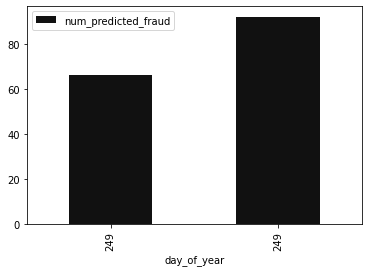

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()


In [21]:
# Now i can compare the predicted frauds in this table with the frauds from our synthetic data in trans_fg


# join 'cc_fraud_results' with 'trans_fg' on 'tid'

# Then, count the TP,TN,FP,FN results. 

# Save these results to a new FG - fraud_confusion_matrix_fg, indexed by "day"


# Dashboard for Business People: F1 Score. Github Pages.

# Data Scientists - Debug: show me all the False Negatives, False Positives, True Positives, 
# UI == Notebook?
# including their features. True Negatives is way too many! Slice this by a date-range, e.g., "Most recent"
# Fraud labels arrive much later. 



# Fraud investigator - 
# Streamlit? 
# * Show me all the predicted fraud examples not yet handled. 
# * For each transaction, show me user_profile, transaction counts in time windows, other features? 
# * Enough details to identify a 'chain attack' or a 'geographic attack' by an investigator.
#
# * Select "outstanding suspected fraud transactions"
# * Label a transaction as "FRAUD" or "NOT_FRAUD"
# * For online fraud - show false positives, so the investigator can "fix" them 
#   (e.g., allow more transactions/4-hr-period)

# Online Credit Card Payment Simulator
# UI: Streamlit
# Select probability of fraud. (maybe other features as well)
# Then the system generates 1 transaction and scores it and returns 'fraud' or 'not_fraud'.
# You can see the features


# Online Credit Card Payment Geographic Attack Simulator
# UI: Streamlit
# 1. Select position on map and then press "pay" and an amount. Returns "fraud" or 'not_fraud'.
# Repeat step 1.


# Online - how to compute loc_delta
# Add new FG and FV with [cc_num, datetime_last_transaction, longitude, latitude]

# sml/cc_features.py
#
# def compute_loc_delta(cc_num, longitude, latitude, timestamp, prev_long, prev_lat, prev_ts):
#    Make sure the time between the distances is taken into account 
#    if prev_ts < 4 hrs :
#        return haverstein(longitude, latitude, prev_long, prev_lat, timestamp - prev_ts)
#    return 0
#
# To add this function to the python path, so that we can import it in our online inference pipeline, do
#    # fraud_features.py
#
#    #Feature Pipeline - challenge in spark/python to group_by cc_num, then process 2 rows at time
#    import sml
#    loc_delta_minus1 = sml.cc_features.compute_loc_delta(....)
#
#
#
#    #Online Inference Pipeline
#
#    # Can we add this to hsml ??!??
#    https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
#    import sys
#    # caution: path[0] is reserved for script path (or '' in REPL)
#    exists_path = os.environ["ARTIFACT_FILES_PATH"]
#    if exists_path != "" and len(sys.path) == 1:
#       sys.path.insert(1, exists_path)
#
#
#    import cc_features
#
#    prev_long, prev_lat, prev_ts = fv.get_feature_vector({keys: [("cc_num": cc_num)]})
#    loc_delta_minus1 = cc_features.compute_loc_delta(....)
#
#